# 4. Spatio-temporal diversity of BARK 

In [3]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/bark

In [4]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/bark'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/bark


In [5]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [6]:
from qiime2 import Visualization
import qiime2 as q2
from qiime2 import Visualization
from qiime2 import Artifact
from qiime2 import Metadata
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2.plugins.diversity.visualizers import alpha_group_significance


from qiime2.plugins import diversity as q2d

%matplotlib inline

In [7]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv')
taxonomy = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza')

In [8]:
# just use the same rarefaction depth for all sample types
depth = 15000 
threads = 5

# Diversity 

In [15]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_table.qza')

depth of 5000: Retained 165’000 (16.55%) features in 33 (100.00%) samples

--> could go much higher! even with 15000: Retained 450’000 (45.13%) features in 30 (90.91%) samples

In [16]:
Visualization.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_table.qzv')

<visualization: Visualization uuid: a5cfb3fa-aecf-452e-b216-3462f72723d4>

In [17]:
core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='bark_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/util/_warning.py:60: UserWarning: observed_otus is deprecated as of 0.6.0.
  warn(f"{func.__name__} is deprecated as of {ver}.")


In [12]:
Visualization.load(f'{workdir}/{output_dir}/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: 94bd9b43-8a85-40cd-904b-cdfbc2458d60>

In [13]:
Visualization.load(f'{workdir}/{output_dir}/jaccard_emperor.qzv')

<visualization: Visualization uuid: 78a4d7b5-4510-4c7f-9e8c-a6a2b31a7445>

## Kmerizer 

In [29]:
#!rm -r kmer-core-metrics

In [18]:
%%bash

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_table.qza \
    --o-filtered-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_rep_seqs.qza

qiime kmerizer core-metrics \
    --i-sequences /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_rep_seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_table.qza \
    --p-sampling-depth 15000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir bark_kmer_cm15000/

Saved FeatureData[Sequence] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: bark_kmer_cm15000/rarefied_table.qza
Saved FeatureTable[Frequency] to: bark_kmer_cm15000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: bark_kmer_cm15000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: bark_kmer_cm15000/shannon_vector.qza
Saved DistanceMatrix to: bark_kmer_cm15000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: bark_kmer_cm15000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: bark_kmer_cm15000/jaccard_pcoa_results.qza
Saved PCoAResults to: bark_kmer_cm15000/bray_curtis_pcoa_results.qza
Saved Visualization to: bark_kmer_cm15000/scatterplot.qzv


In [24]:
Visualization.load('bark_kmer_cm15000/scatterplot.qzv')

<visualization: Visualization uuid: 46958b4d-d858-4d4c-a20f-94fbda4d59de>

### Alpha Group Significance 

In [25]:
# metrics: 
alpha_metrics = ['shannon_vector', 'observed_features_vector', 'evenness_vector']

for m in alpha_metrics:
    ags, = alpha_group_significance(alpha_diversity = core_div_dict[m],
                               metadata = md)
    ags.save(output_dir + 'alpha_groupSig_{0}.qzv'.format(m))

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

In [26]:
Visualization.load(f'{output_dir}/alpha_groupSig_evenness_vector.qzv')

<visualization: Visualization uuid: c1d47ff2-ec51-45bb-be8d-3159c62b6fa2>

In [27]:
Visualization.load(f'{output_dir}/alpha_groupSig_observed_features_vector.qzv')

<visualization: Visualization uuid: 0142ebe9-999c-438b-93d4-5f3233f954ad>

In [28]:
Visualization.load(f'{output_dir}/alpha_groupSig_shannon_vector.qzv')

<visualization: Visualization uuid: a62b9be7-0c54-4f3f-9d5f-4b8733fe254f>

### PERMANOVA

-> note bark was only collected once per year (veraison) 

In [19]:
formula = 'Plot_ID * Year'

beta_metrics = ['bray_curtis', 'jaccard']

# PERMANOVA with core metrics 
for m in beta_metrics:
    adonis_res, = q2d.actions.adonis(
        distance_matrix=core_div_dict[m + '_distance_matrix'],
        metadata=md,
        formula=formula,
        n_jobs=3)
    adonis_res.save(output_dir + 'adonis_{0}.qzv'.format(m))
    

# PERMANOVA with kmer core metrics 
kmer_dir = 'bark_kmer_cm15000'
    
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{kmer_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{kmer_dir}/adonis_{m}.qzv"

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmph84ph6hj/dm.tsv /scratch/lfloerl/tmpdata/tmph84ph6hj/md.tsv Plot_ID * Year 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-yb2vg_d7/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmpvfmtw_pa/dm.tsv /scratch/lfloerl/tmpdata/tmpvfmtw_pa/md.tsv Plot_ID * Year 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-ckopy2vs/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Saved Visualization to: bark_kmer_cm15000/adonis_bray_curtis.qzv
Saved Visualization to: bark_kmer_cm15000/adonis_jaccard.qzv


In [30]:
Visualization.load(f'{output_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: f0d9a075-8977-41ee-a4c8-45bf7dd4a23c>

In [31]:
Visualization.load(f'{output_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 9c33dfed-6960-41b9-9d2e-a79caef55f5d>

In [32]:
Visualization.load(f'{kmer_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: 50ace067-0d9f-4211-88c7-f7e42cbb24de>

In [33]:
Visualization.load(f'{kmer_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: f314c4cd-e1db-4dce-8830-da17baac730d>

#  Mantel tests - Geographic 

In [20]:
!ls

bark_cm15000	   bark_mantel		    bark_veraison21_kmer_cm15000
bark_kmer_cm15000  bark_veraison21_cm15000


In [21]:
%%bash 

div_dir='bark_cm15000'
kmer_dir='bark_kmer_cm15000'

# geodisic distance
#qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS.qza --output-path geodesic_distance_ITS

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported bark_cm15000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_cm15000/bray_curtis_distance_matrix
Exported bark_cm15000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_cm15000/jaccard_distance_matrix
Exported bark_kmer_cm15000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_kmer_cm15000/bray_curtis_distance_matrix
Exported bark_kmer_cm15000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_kmer_cm15000/jaccard_distance_matrix


In [26]:
%%bash
geodesic_path='/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/geodesic_distance_ITS/distance-matrix.tsv'

folder_path_1="bark_cm15000"
folder_path_2="bark_kmer_cm15000"

# Call the R script and pass folder paths and geodesic matrix
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/mantel_test.R "$folder_path_1" "$folder_path_2" "$geodesic_path"

                                           Test Mantel_statistic_r Significance
1      bark_cm15000-bray_curtis_distance_matrix         0.07074344        0.179
2          bark_cm15000-jaccard_distance_matrix         0.02064559        0.386
3 bark_kmer_cm15000-bray_curtis_distance_matrix         0.08967257        0.116
4     bark_kmer_cm15000-jaccard_distance_matrix         0.06932938        0.201


In [28]:
mantel = pd.read_csv("bark_kmer_cm15000/mantel_results.tsv", sep="\t")
mantel

,Test,Mantel_statistic_r,Significance
0,bark_cm15000-bray_curtis_distance_matrix,0.070743,0.179
1,bark_cm15000-jaccard_distance_matrix,0.020646,0.386
2,bark_kmer_cm15000-bray_curtis_distance_matrix,0.089673,0.116
3,bark_kmer_cm15000-jaccard_distance_matrix,0.069329,0.201


## Visualize

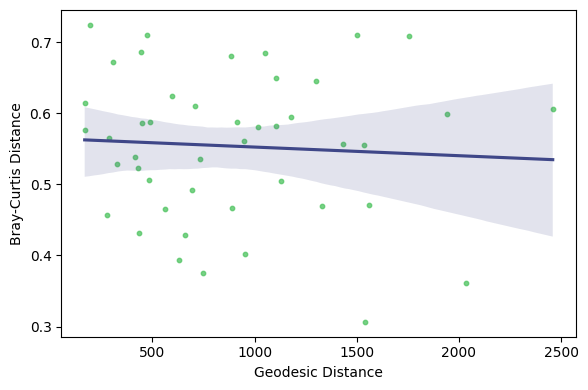

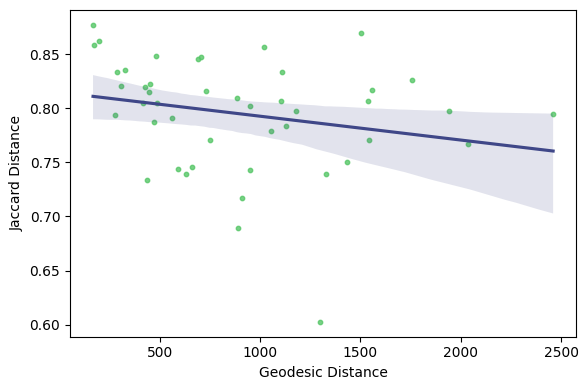

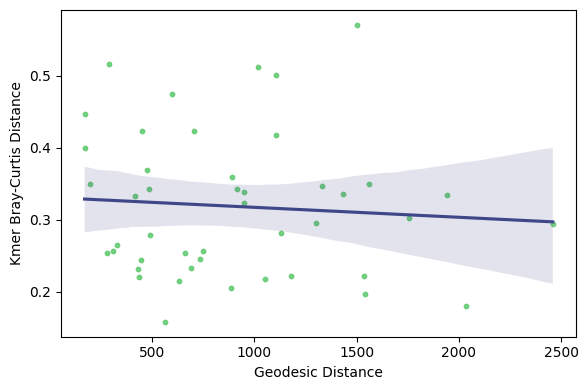

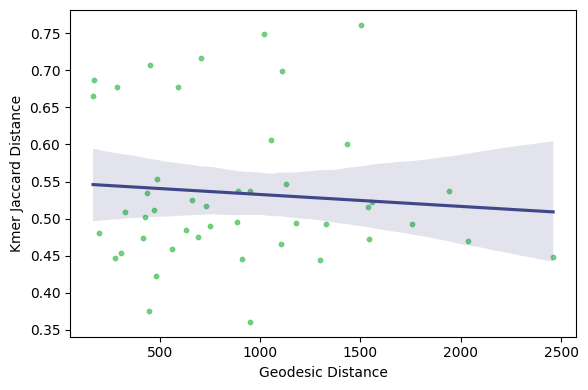

In [12]:
folder = 'MV-must_Year2022'

dir_prefix = 'cm4500'
kmer_dir_prefix = 'kmer_cm4500'

geodesic_path = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/geodesic_distance_ITS/distance-matrix.tsv'

# Define paths for distance matrices
bray_curtis_path = os.path.join(folder, dir_prefix, 'bray_curtis_distance_matrix', 'distance-matrix.tsv')
jaccard_path = os.path.join(folder, dir_prefix, 'jaccard_distance_matrix', 'distance-matrix.tsv')
bray_curtis_kmer_path = os.path.join(folder, kmer_dir_prefix, 'bray_curtis_distance_matrix', 'distance-matrix.tsv')
jaccard_kmer_path = os.path.join(folder, kmer_dir_prefix, 'jaccard_distance_matrix', 'distance-matrix.tsv')

metrics = [bray_curtis_path, jaccard_path, bray_curtis_kmer_path, jaccard_kmer_path]

# Labels for the scatter plots
labels = [ ('Geodesic Distance', 'Bray-Curtis Distance'),
    ('Geodesic Distance', 'Jaccard Distance'),
    ('Geodesic Distance', 'Kmer Bray-Curtis Distance'),
    ('Geodesic Distance', 'Kmer Jaccard Distance')]

for metric, (x_label, y_label) in zip(metrics, labels):

    # Load the geodesic distance matrix
    dm1 = pd.read_csv(geodesic_path, sep='\t', index_col=0)

    # Load the other distance matrix
    dm2 = pd.read_csv(metric, sep='\t', index_col=0)

    # Align matrices by common indices
    common_ids = dm1.index.intersection(dm2.index)
    if len(common_ids) == 0:
        raise ValueError(f"No common IDs found between {geodesic_path} and {metric}.")

    dm1 = dm1.loc[common_ids, common_ids]
    dm2 = dm2.loc[common_ids, common_ids]

    # Extract upper triangular values (excluding diagonal)
    dm1_flat = dm1.where(np.triu(np.ones(dm1.shape), k=1).astype(bool)).stack()
    dm2_flat = dm2.where(np.triu(np.ones(dm2.shape), k=1).astype(bool)).stack()

    # Create scatter plot with regression line
    plt.figure(figsize=(6, 4))
    sns.regplot(x=dm1_flat, y=dm2_flat, scatter_kws={'s': 10, 'color': '#56C667FF'}, line_kws={'color': '#3F4788FF'})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()


# SUBSET TO SINGLE TIME POINT 

In [38]:
%%bash 

# subset to only harvest samples before fitting 
qiime feature-table filter-samples \
  --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_filtered_table.qza \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
  --p-where "[Collection_ID]='Veraison_2021'" \
  --o-filtered-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_table.qza

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_table.qza \
    --o-filtered-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_rep_seqs.qza

Saved FeatureTable[Frequency] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_table.qza
Saved FeatureData[Sequence] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_rep_seqs.qza


In [61]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_table.qza')

core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='bark_veraison21_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

## Kmerizer 

In [59]:
#!rm -r kmer-core-metrics

In [62]:
%%bash

qiime kmerizer core-metrics \
    --i-sequences /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_rep_seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/bark_veraison21_filtered_table.qza \
    --p-sampling-depth 15000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir bark_veraison21_kmer_cm15000/

Saved FeatureTable[Frequency] to: bark_veraison21_kmer_cm15000/rarefied_table.qza
Saved FeatureTable[Frequency] to: bark_veraison21_kmer_cm15000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: bark_veraison21_kmer_cm15000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: bark_veraison21_kmer_cm15000/shannon_vector.qza
Saved DistanceMatrix to: bark_veraison21_kmer_cm15000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: bark_veraison21_kmer_cm15000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: bark_veraison21_kmer_cm15000/jaccard_pcoa_results.qza
Saved PCoAResults to: bark_veraison21_kmer_cm15000/bray_curtis_pcoa_results.qza
Saved Visualization to: bark_veraison21_kmer_cm15000/scatterplot.qzv


In [44]:
Visualization.load('bark_veraison21_kmer_cm15000/scatterplot.qzv')

<visualization: Visualization uuid: 04325220-1b35-4c5a-81e3-f1ff54c68527>

### Mantel 

In [63]:
%%bash 

div_dir='bark_veraison21_cm15000'
kmer_dir='bark_veraison21_kmer_cm15000'

# geodisic distance
#qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS.qza --output-path geodesic_distance_ITS

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported bark_veraison21_cm15000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_veraison21_cm15000/bray_curtis_distance_matrix
Exported bark_veraison21_cm15000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_veraison21_cm15000/jaccard_distance_matrix
Exported bark_veraison21_kmer_cm15000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_veraison21_kmer_cm15000/bray_curtis_distance_matrix
Exported bark_veraison21_kmer_cm15000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory bark_veraison21_kmer_cm15000/jaccard_distance_matrix


In [29]:
%%bash
geodesic_path='/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/geodesic_distance_ITS/distance-matrix.tsv'

folder_path_1="bark_veraison21_cm15000"
folder_path_2="bark_veraison21_kmer_cm15000"

# Call the R script and pass folder paths and geodesic matrix
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/mantel_test.R "$folder_path_1" "$folder_path_2" "$geodesic_path"

                                                      Test Mantel_statistic_r
1      bark_veraison21_cm15000-bray_curtis_distance_matrix        0.006554776
2          bark_veraison21_cm15000-jaccard_distance_matrix       -0.002337985
3 bark_veraison21_kmer_cm15000-bray_curtis_distance_matrix        0.072915145
4     bark_veraison21_kmer_cm15000-jaccard_distance_matrix       -0.003068573
  Significance
1        0.482
2        0.493
3        0.355
4        0.440


In [30]:
mantel = pd.read_csv("bark_veraison21_kmer_cm15000/mantel_results.tsv", sep="\t")
mantel

,Test,Mantel_statistic_r,Significance
0,bark_veraison21_cm15000-bray_curtis_distance_m...,0.006555,0.482
1,bark_veraison21_cm15000-jaccard_distance_matrix,-0.002338,0.493
2,bark_veraison21_kmer_cm15000-bray_curtis_dista...,0.072915,0.355
3,bark_veraison21_kmer_cm15000-jaccard_distance_...,-0.003069,0.440
